In [1]:
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt

def calculate_mlae(y_test, y_pred):

  MLAE = np.log2(sklearn.metrics.mean_absolute_error(np.multiply(y_pred,100), np.multiply(y_test,100))+.125)
  #compute mae first before log

  MLAE_NEW = np.mean( np.log2( np.abs(np.multiply(y_pred,100) - np.multiply(y_test,100)) + .125 ) )
  #apply log first before average
  
  MLAE_RAMI = np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test)+.125) # Nguyen 2025
  #use real number to caculate

  MLAE_OLD = np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test)+.125) # Haehn 2018

  return MLAE, MLAE_NEW, MLAE_RAMI, MLAE_OLD


# Define dataset
y_test1 = np.array([40, 45, 10, 20, 30, 50, 60, 70, 80, 90, 12, 22, 32, 42, 52, 62, 72, 82, 25, 35])
y_pred1 = np.array([45, 60, 5, 12, 28, 38, 55, 68, 77, 89, 15, 27, 37, 47, 57, 67, 78, 88, 20, 30])

# Compute overall MLAE values
mlae_1, mlae_2, mlae_3, mlae_4 = calculate_mlae(y_test1, y_pred1)
mlae_1, mlae_2, mlae_3, mlae_4 

(9.077149515589733, 8.846880906515228, 2.465974464504069, 2.465974464504069)

In [2]:
# Function to compute per-prediction MLAE values
def calculate_mlae_per_prediction(y_test, y_pred):
    abs_errors_100 = np.abs(np.multiply(y_pred, 100) - np.multiply(y_test, 100))  # Absolute error (scaled)
    abs_errors_real = np.abs(y_pred - y_test)  # Absolute error (real scale)

    mlae_1_per_pred = np.full_like(abs_errors_100, np.log2(sklearn.metrics.mean_absolute_error(np.multiply(y_pred, 100), np.multiply(y_test, 100)) + 0.125))  # MLAE (Original, one value repeated)
   
    mlae_2_per_pred = np.log2(abs_errors_100 + 0.125)  # MLAE_NEW (log before avg, true per-prediction)
    mlae_3_per_pred = np.full_like(abs_errors_real, np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test) + 0.125))  # MLAE_RAMI 
    mlae_4_per_pred = np.full_like(abs_errors_real, np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test) + 0.125)) 

    return mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred, abs_errors_100, abs_errors_real

# Compute per-prediction MLAE values
mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred, abs_errors_100, abs_errors_real = calculate_mlae_per_prediction(y_test1, y_pred1)


MLAE values for CustomLLaMA:
MLAE (Original): 12.9935
MLAE_NEW (Log Before Avg): 12.3735
MLAE_RAMI (Real Scale): 6.3518
MLAE_OLD (Haehn 2018): 6.3518

MLAE values for LLaMA:
MLAE (Original): 11.5923
MLAE_NEW (Log Before Avg): 11.1333
MLAE_RAMI (Real Scale): 4.9542
MLAE_OLD (Haehn 2018): 4.9542


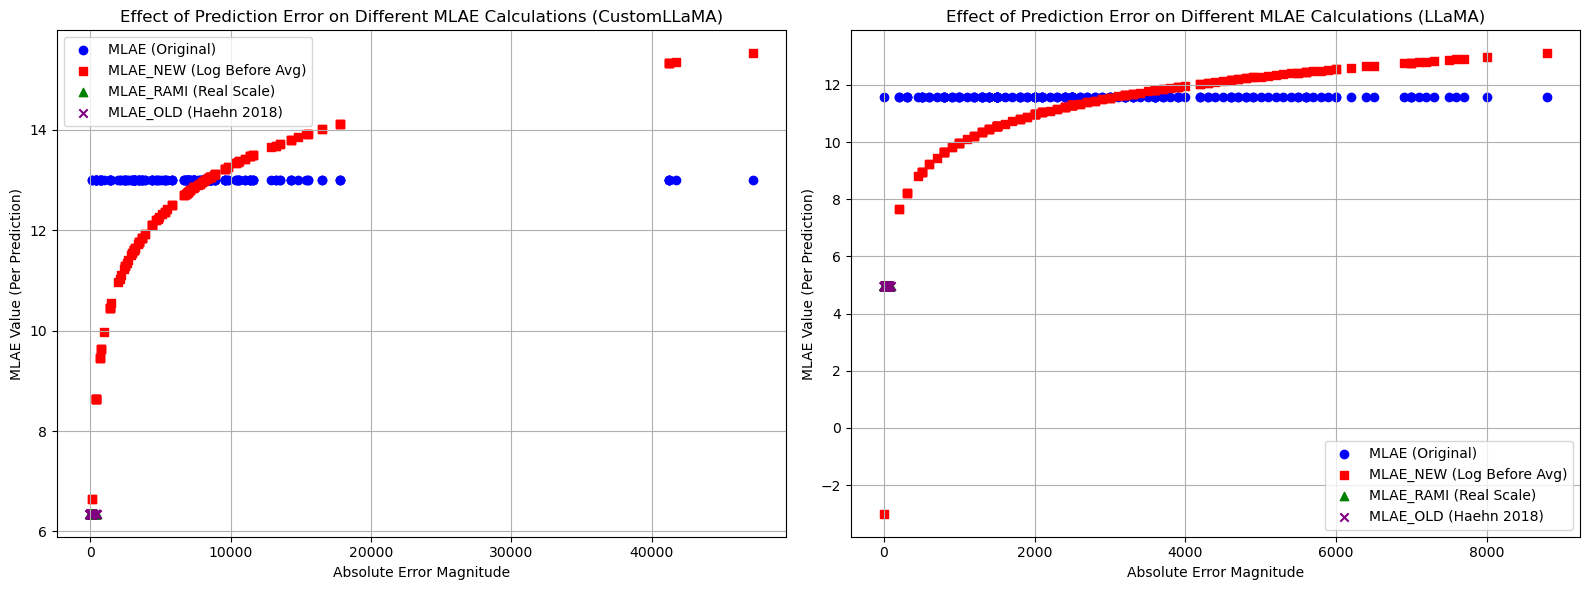

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
angle_dataframe = pd.read_csv("angle_dataframe")  # Ensure correct file extension

def calculate_mlae(y_test, y_pred):

  MLAE = np.log2(sklearn.metrics.mean_absolute_error(np.multiply(y_pred,100), np.multiply(y_test,100))+.125)
  #compute mae first before log

  MLAE_NEW = np.mean( np.log2( np.abs(np.multiply(y_pred,100) - np.multiply(y_test,100)) + .125 ) )
  #apply log first before average
  
  MLAE_RAMI = np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test)+.125) # Nguyen 2025
  #use real number to caculate

  MLAE_OLD = np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test)+.125) # Haehn 2018

  return MLAE, MLAE_NEW, MLAE_RAMI, MLAE_OLD


def calculate_mlae_per_prediction(y_test, y_pred):
    abs_errors_100 = np.abs(np.multiply(y_pred, 100) - np.multiply(y_test, 100))  # Absolute error (scaled)
    abs_errors_real = np.abs(y_pred - y_test)  # Absolute error (real scale)

    mlae_1_per_pred = np.full_like(abs_errors_100, np.log2(sklearn.metrics.mean_absolute_error(np.multiply(y_pred, 100), np.multiply(y_test, 100)) + 0.125))  # MLAE (Original, one value repeated)
   
    mlae_2_per_pred = np.log2(abs_errors_100 + 0.125)  # MLAE_NEW (log before avg, true per-prediction)
    mlae_3_per_pred = np.full_like(abs_errors_real, np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test) + 0.125))  # MLAE_RAMI 
    mlae_4_per_pred = np.full_like(abs_errors_real, np.log2(sklearn.metrics.mean_absolute_error(y_pred, y_test) + 0.125)) 

    return mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred, abs_errors_100, abs_errors_real


# Function to process a specific model
def process_model(model_name):
    model_data = angle_dataframe[angle_dataframe["model_name"] == model_name]
    y_test = model_data["ground_truth"].to_numpy()
    y_pred = model_data["cleaned_answers"].to_numpy()

    # Compute overall MLAE values
    mlae_1, mlae_2, mlae_3, mlae_4 = calculate_mlae(y_test, y_pred)

    # Compute per-prediction MLAE values
    mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred, abs_errors_100, abs_errors_real = calculate_mlae_per_prediction(y_test, y_pred)

    # Print overall MLAE values
    print(f"\nMLAE values for {model_name}:")
    print(f"MLAE (Original): {mlae_1:.4f}")
    print(f"MLAE_NEW (Log Before Avg): {mlae_2:.4f}")
    print(f"MLAE_RAMI (Real Scale): {mlae_3:.4f}")
    print(f"MLAE_OLD (Haehn 2018): {mlae_4:.4f}")

    return abs_errors_100, abs_errors_real, mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred

# Process both models
customllama_data = process_model("CustomLLaMA")
llama_data = process_model("LLaMA")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, model_name, data in zip(axes, ["CustomLLaMA", "LLaMA"], [customllama_data, llama_data]):
    abs_errors_100, abs_errors_real, mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred = data

    ax.scatter(abs_errors_100, mlae_1_per_pred, marker='o', label="MLAE (Original)", color='blue')
    ax.scatter(abs_errors_100, mlae_2_per_pred, marker='s', label="MLAE_NEW (Log Before Avg)", color='red')
    ax.scatter(abs_errors_real, mlae_3_per_pred, marker='^', label="MLAE_RAMI (Real Scale)", color='green')
    ax.scatter(abs_errors_real, mlae_4_per_pred, marker='x', label="MLAE_OLD (Haehn 2018)", color='purple')

    ax.set_xlabel("Absolute Error Magnitude")
    ax.set_ylabel("MLAE Value (Per Prediction)")
    ax.set_title(f"Effect of Prediction Error on Different MLAE Calculations ({model_name})")
    ax.legend()
    ax.grid(True)

# Adjust layout and show both plots
plt.tight_layout()
plt.show()


In [14]:
Llama['cleaned_answers'].unique()


array([58. , 67. , 75. , 30. , 60. , 80. , 70. , 76. , 45. , 50. , 43. ,
       65. , 82. , 63. , 78. , 57. , 85. , 73. , 90. , 69. , 66. , 72. ,
       70.5, 53. , 86. , 35. , 40. , 55. ,  3. , 79. ])

In [4]:
import pandas as pd

# Load dataset
volume_df = pd.read_csv("volume_df")  # Ensure correct file extension
volume_df['model_name'].unique()

array(['CustomLLaMA', 'Gemini1_5Flash', 'GeminiProVision', 'LLaMA',
       'gpt4o'], dtype=object)

MLAE (Original): 20.5557
MLAE_NEW (Log Before Avg): 16.7130
MLAE_RAMI (Real Scale): 13.9118
MLAE_OLD (Haehn 2018): 13.9118


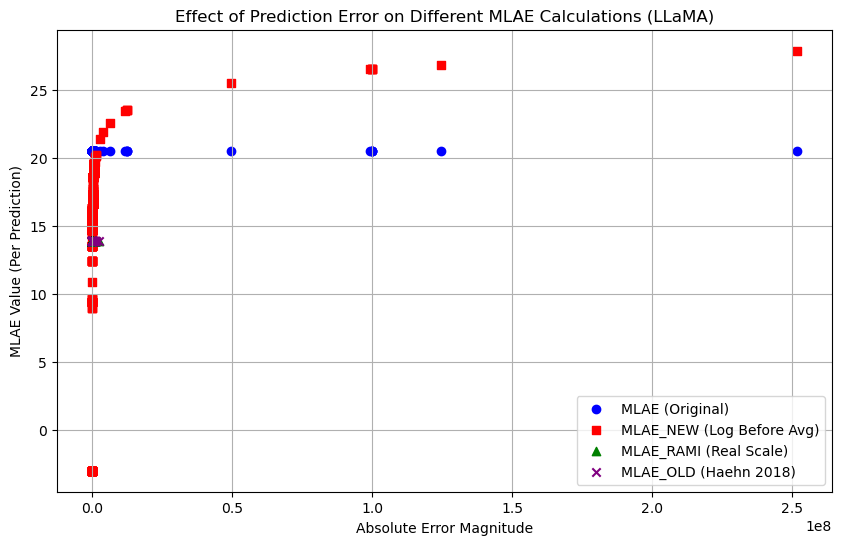

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

# Filter for CustomLLaMA model
LLaMA = volume_df[volume_df["model_name"] == "LLaMA"]

# Extract ground truth and predictions
y_test = volume_df["ground_truth"].to_numpy()
y_pred = volume_df["cleaned_answers"].to_numpy()

# Compute overall MLAE values
mlae_1, mlae_2, mlae_3, mlae_4 = calculate_mlae(y_test, y_pred)

# Compute per-prediction MLAE values
mlae_1_per_pred, mlae_2_per_pred, mlae_3_per_pred, mlae_4_per_pred, abs_errors_100, abs_errors_real = calculate_mlae_per_prediction(y_test, y_pred)

# Print overall MLAE values
print(f"MLAE (Original): {mlae_1:.4f}")
print(f"MLAE_NEW (Log Before Avg): {mlae_2:.4f}")
print(f"MLAE_RAMI (Real Scale): {mlae_3:.4f}")
print(f"MLAE_OLD (Haehn 2018): {mlae_4:.4f}")

# Create scatter plot of error magnitude vs. MLAE per prediction
plt.figure(figsize=(10, 6))
plt.scatter(abs_errors_100, mlae_1_per_pred, marker='o', label="MLAE (Original)", color='blue')
plt.scatter(abs_errors_100, mlae_2_per_pred, marker='s', label="MLAE_NEW (Log Before Avg)", color='red')
plt.scatter(abs_errors_real, mlae_3_per_pred, marker='^', label="MLAE_RAMI (Real Scale)", color='green')
plt.scatter(abs_errors_real, mlae_4_per_pred, marker='x', label="MLAE_OLD (Haehn 2018)", color='purple')

# Labels and titles
plt.xlabel("Absolute Error Magnitude")
plt.ylabel("MLAE Value (Per Prediction)")
plt.title("Effect of Prediction Error on Different MLAE Calculations (LLaMA)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
MLAE_original 

1. Scale predictions and ground truth values by 100 

2. Compute the MAE on the scaled values

3. Add 0.125 to result 

4. Compute log

==> Compute single MAE for all predictions (then log)


MLAE_NEW 

1. Scale predictions and ground truth values by 100 

2. Caculate absolute error 

3. Add 0.125

4. Compute log

5. Compute the mean all logs- error

==> Caculate log error for each prediction, then average log error 

MLAE_RAMI and MLAE OLD

1. Compute MAE 

2. Add 0.125

3. Compute log